In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.metrics import structural_similarity as ssim

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array

from keras import layers

from skimage.metrics import structural_similarity as ssim

2024-08-26 11:43:44.662827: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-26 11:43:44.663850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 11:43:44.684480: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 11:43:44.684897: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-26 11:43:44.999406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
path='processed/'
test_set=os.listdir(path)
SIZE=800

In [3]:
test_hr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)

test_lr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_lr.append(img)
test_lr=np.array(test_lr)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 357.02it/s]


In [4]:
def mse(img,target):
    mse=np.mean((img-target)**2)
    return mse

In [5]:
model_path = 'models/base_model_800.h5'

model=tf.keras.models.load_model(model_path)

In [6]:
def evaluate_model(test_hr,test_lr,model):

    i=np.random.randint(0,len(test_hr))

    img,target=test_lr[i],test_hr[i]
    target=cv2.resize(target,(800,800))
    output=model.predict(img.reshape(1,SIZE,SIZE,3))[0]

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
    
    ax1.imshow(img)
    ax1.set_title('Low-resolution image',fontsize=16)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    
    ax2.imshow(output)
    ax2.set_title('Model output',fontsize=16)
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    
    ax3.imshow(target)
    ax3.set_title('High-resolution image',fontsize=16)
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)

    print('')
    print('SSIM between LR image and HR image: {}'.format(ssim(img,target,channel_axis=-1, data_range = 1)))
    print('SSIM between model output and HR image: {}'.format(ssim(output,target,channel_axis=-1, data_range = 1)))
    print('')
    print('MSE between LR image and HR image: {}'.format(mse(img,target)))
    print('MSE between model output and HR image: {}'.format(mse(output,target)))
    print('')

1/1 [==============================] - 0s 114ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



SSIM between LR image and HR image: 0.7918906211853027
SSIM between model output and HR image: 0.8890854716300964

MSE between LR image and HR image: 0.017493678256869316
MSE between model output and HR image: 0.010422204621136189



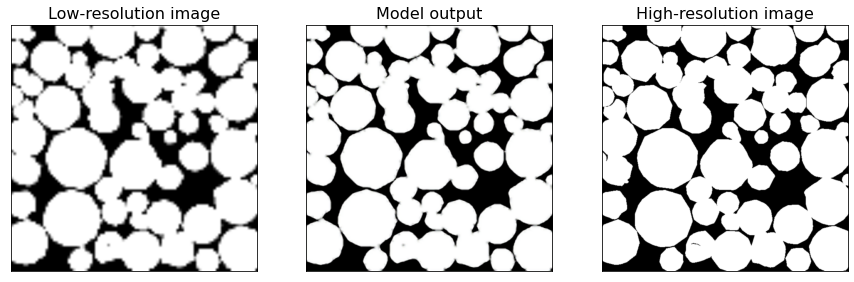

In [7]:
evaluate_model(test_hr,test_lr,model)

In [8]:
def compare_models(test_hr,test_lr,model1, model2):

    i=np.random.randint(0,len(test_hr))

    img,target=test_lr[i],test_hr[i]
    output1=model1.predict(img.reshape(1,SIZE,SIZE,3))[0]
    output2=model2.predict(img.reshape(1,SIZE,SIZE,3))[0]
    
    
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
    
    ax1.imshow(output1)
    ax1.set_title('SRCNN',fontsize=16)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    
    ax2.imshow(output2)
    ax2.set_title('TL-SRCNN',fontsize=16)
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    
    ax3.imshow(target)
    ax3.set_title('High-resolution image',fontsize=16)
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)

    print('')
    print('SSIM between SRCNN and HR image: {}'.format(ssim(output1,target,channel_axis=-1, data_range = 1)))
    print('SSIM between TL-SRCNN and HR image: {}'.format(ssim(output2,target,channel_axis=-1, data_range = 1)))
    print('')
    print('MSE between SRCNN and HR image: {}'.format(mse(output1,target)))
    print('MSE between TL-SRCNN and HR image: {}'.format(mse(output2,target)))
    print('')

In [9]:
path='dataset/'
test_set=os.listdir(path)
SIZE=800

In [10]:
test_hr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)

test_lr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_lr.append(img)
test_lr=np.array(test_lr)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:07<00:00, 110.27it/s]


1/1 [==============================] - 0s 79ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



SSIM between SRCNN and HR image: 0.4888783395290375
SSIM between TL-SRCNN and HR image: 0.509320855140686

MSE between SRCNN and HR image: 0.006855501793324947
MSE between TL-SRCNN and HR image: 0.006326836068183184



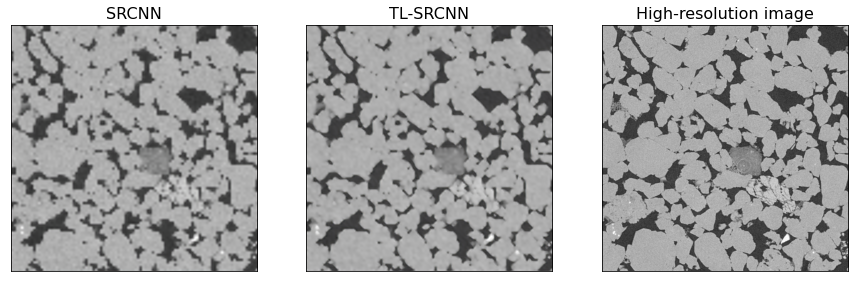

In [15]:
model_path = 'models/SRCNN_800_64.keras'

model1=tf.keras.models.load_model(model_path)

model_path = 'models/SRCNNwTL_800_64.keras'

model2=tf.keras.models.load_model(model_path)

compare_models(test_hr, test_lr, model1, model2)